In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
hotel_data = pd.read_csv(r'C:\Users\jaypa\Downloads\a\hotel_bookings.csv')
hotel_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
columns_to_drop = [
    'lead_time', 'reservation_status_date', 'required_car_parking_spaces',
    'adr', 'company', 'agent', 'deposit_type', 
    'distribution_channel', 'is_repeated_guest']
hotel_data.drop(columns=columns_to_drop, axis='columns', inplace=True)
print(hotel_data.columns)


Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'total_of_special_requests', 'reservation_status'],
      dtype='object')


In [9]:
hotel_data.dropna(inplace=True)

In [10]:
hotel_data.isnull().sum()


hotel                             0
is_canceled                       0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
total_of_special_requests         0
reservation_status                0
dtype: int64

In [11]:
hotel_data['total_stay'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
average_stay_length = hotel_data['total_stay'].mean()
print(f"Average Stay Length: {average_stay_length:.3f} nights")

Average Stay Length: 3.431 nights


In [12]:
hotel_data.describe()


,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,total_of_special_requests,total_stay
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.087142,0.131634,0.221181,2.330754,0.571683,3.431042
std,0.483168,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.845869,1.484672,0.652785,17.630452,0.792678,2.544938
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,1.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5.000000,57.000000


In [13]:
hotel_data['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

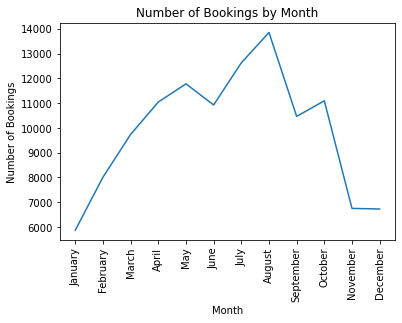

In [14]:
months_order = ["January", "February", "March", "April", "May", "June", "July",
                "August", "September", "October", "November", "December"]
hotel_data['arrival_date_month'] = pd.Categorical(hotel_data['arrival_date_month'], 
                                                  categories=months_order, ordered=True)
monthly_bookings = hotel_data.groupby('arrival_date_month').size()
sns.lineplot(data=monthly_bookings)
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.show()

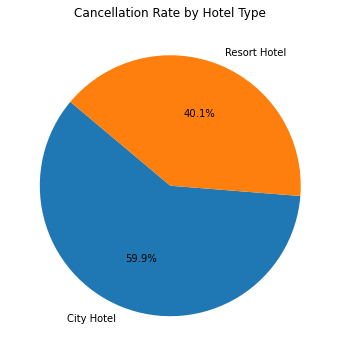

In [20]:

plt.figure(figsize=(8, 6))
plt.pie(cancellation_rate.values, labels=cancellation_rate.index, autopct='%1.1f%%', startangle=140)
plt.title('Cancellation Rate by Hotel Type')
plt.show()



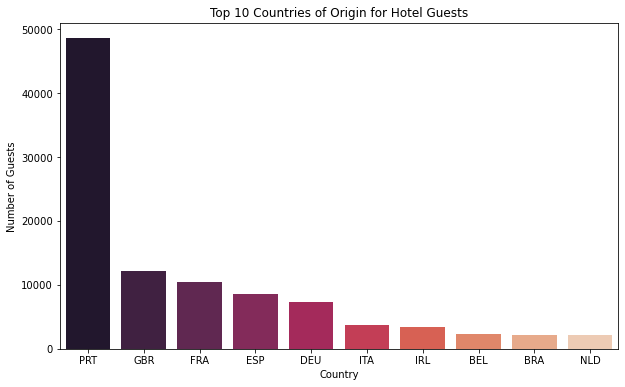

In [16]:
country_counts = hotel_data['country'].value_counts().nlargest(10)  
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values,palette='rocket')
plt.title('Top 10 Countries of Origin for Hotel Guests')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.show()
